In [ ]:
def f(x):
    return 2*(torch.exp(-30*(x - 0.25)**2)+torch.sin(np.pi*x**2))

In [103]:
def f(x):
    return torch.sin(1/(x+0.1))

In [125]:
n = 40
sigma =  0.1 
l = 0.0000001

In [126]:
x  = torch.linspace(0,1,n).unsqueeze(1)
K = torch.exp(-(x - x.T)**2/(2*sigma**2))
V = torch.cholesky(K + n*1e-12*torch.eye(n))
W = torch.cholesky(V.T@V + n*l*torch.eye(n))
y = f(x)

In [127]:
aux = torch.triangular_solve(V.T @ y,W,upper = False)[0]
#torch.triangular_solve(yt,W,upper = False)
aux = torch.triangular_solve(aux,W.T,upper = True)[0]
a = torch.triangular_solve(aux,V.T,upper = True)[0]

In [128]:
ntest = 1000
xtest = torch.linspace(0,1,ntest).unsqueeze(1)

In [129]:
Ktest = torch.exp(-(xtest - x.T)**2/(2*sigma**2))
ytest = Ktest@a

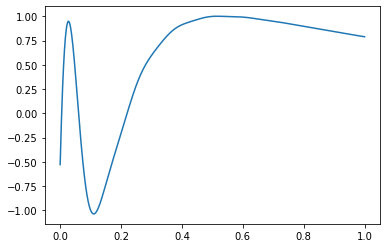

In [130]:

plt.plot(xtest,ytest)

2020-11-04 22:15:47,953  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-04 22:15:47,986  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-04 22:15:47,987  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


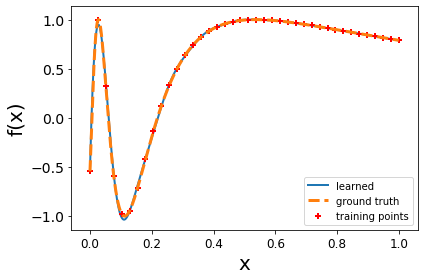

In [132]:


fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,f(xtest),linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(x,f(x),marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("f(x)",fontsize = 20)
    
#plt.ylim(ymin = ymin,ymax = ymax)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
fig.savefig(open('/Users/ulyssemarteau/Desktop/haha.pdf','wb') , format='pdf', dpi=1000)
plt.show()